In [31]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import scipy.optimize as optimization
import matplotlib.pyplot as plt

from BHDVCStf import BHDVCS #modified bhdvcs file
import utilities as uts

In [5]:
bhdvcs = BHDVCS()

df = pd.read_csv('dvcs_psuedo.csv')

numSets = 15
numReplicas = 500

In [13]:
t_range = (df['t'].min(), df['t'].max())
QQ_range = (df['QQ'].min(), df['QQ'].max())
k_range = (df['k'].min(), df['k'].max())
x_b_range = (df['x_b'].min(), df['x_b'].max())

In [19]:
np.random.uniform(t_range[0], t_range[1])

-0.34332621723393253

In [22]:
len(np.array(range(36)))

36

## Kinematic Ranges

x_b : .1 , .7

t : -.1 , -.4

QQ : 1 , 10

k : < 10

-t/QQ < .5

In [44]:
for i in range(numSets):
    kset = pd.DataFrame({'#Set': np.repeat(i, 36),
                         'index': np.array(range(36)),
                         'phi_x': np.array(range(36))*10,
                         'QQ': np.repeat(np.random.uniform(QQ_range[0], QQ_range[1]), 36),
                         'x_b': np.repeat(np.random.uniform(x_b_range[0], x_b_range[1]), 36),
                         't': np.repeat(np.random.uniform(t_range[0], t_range[1]), 36),
                         'k': np.repeat(np.random.uniform(k_range[0], k_range[1]), 36),
                         'dvcs': np.repeat(0.012288, 36)})
    kset['F1'] = uts.f1_f2.ffF1(kset['t'])
    kset['F2'] = uts.f1_f2.ffF2(kset['t'])
    
    kset['ReH'] = 90*kset['t']**2
    kset['ReHtilde'] = 90*kset['t']**2 + 5
    kset['ReE'] = -50*kset['t']**2 - 40
    
    kset['F'] = bhdvcs.TotalUUXS(np.array(kset[['phi_x', 'k', 'QQ', 'x_b', 't', 'F1', 'F2', 'dvcs']]),
                                 kset['ReH'][0], kset['ReE'][0], kset['ReHtilde'][0])
    kset['errF'] = kset['F']*.05
    if i==0:
        data = kset.copy()
    else:
        data = pd.concat([data, kset])
    
data = data.reset_index(drop=True)
data = uts.DvcsData(data)

In [45]:
to_plot = data.df.loc[data.df['index'] == 0, ['QQ', 'x_b', 't', 'k']]

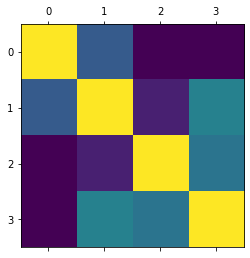

In [46]:
plt.matshow(to_plot.corr())
plt.show()

In [47]:
to_plot.corr()

,QQ,x_b,t,k
QQ,1.000000,0.209782,-0.106038,-0.103283
x_b,0.209782,1.000000,-0.010536,0.380935
t,-0.106038,-0.010536,1.000000,0.319810
k,-0.103283,0.380935,0.319810,1.000000


In [48]:
df.loc[data.df['index'] == 0, ['QQ', 'x_b', 't', 'k']].corr()

,QQ,x_b,t,k
QQ,1.000000,-0.695501,-0.192487,0.416995
x_b,-0.695501,1.000000,-0.078569,-0.689310
t,-0.192487,-0.078569,1.000000,0.398267
k,0.416995,-0.689310,0.398267,1.000000
